#Decision Tree

 1. Pengumpulan dan Persiapan Data
Dataset yang digunakan diunduh dari Kaggle: 🔗 https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

Langkah awal:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("citrus.csv")  # Ganti sesuai nama file dalam zip
print(df.head())
print(df.info())

     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None


 2. Eksplorasi Data dan Visualisasi
Melihat statistik ringkasan:

In [30]:
print(df.describe())


           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000


Visualisasi sebaran fitur terhadap kelas:

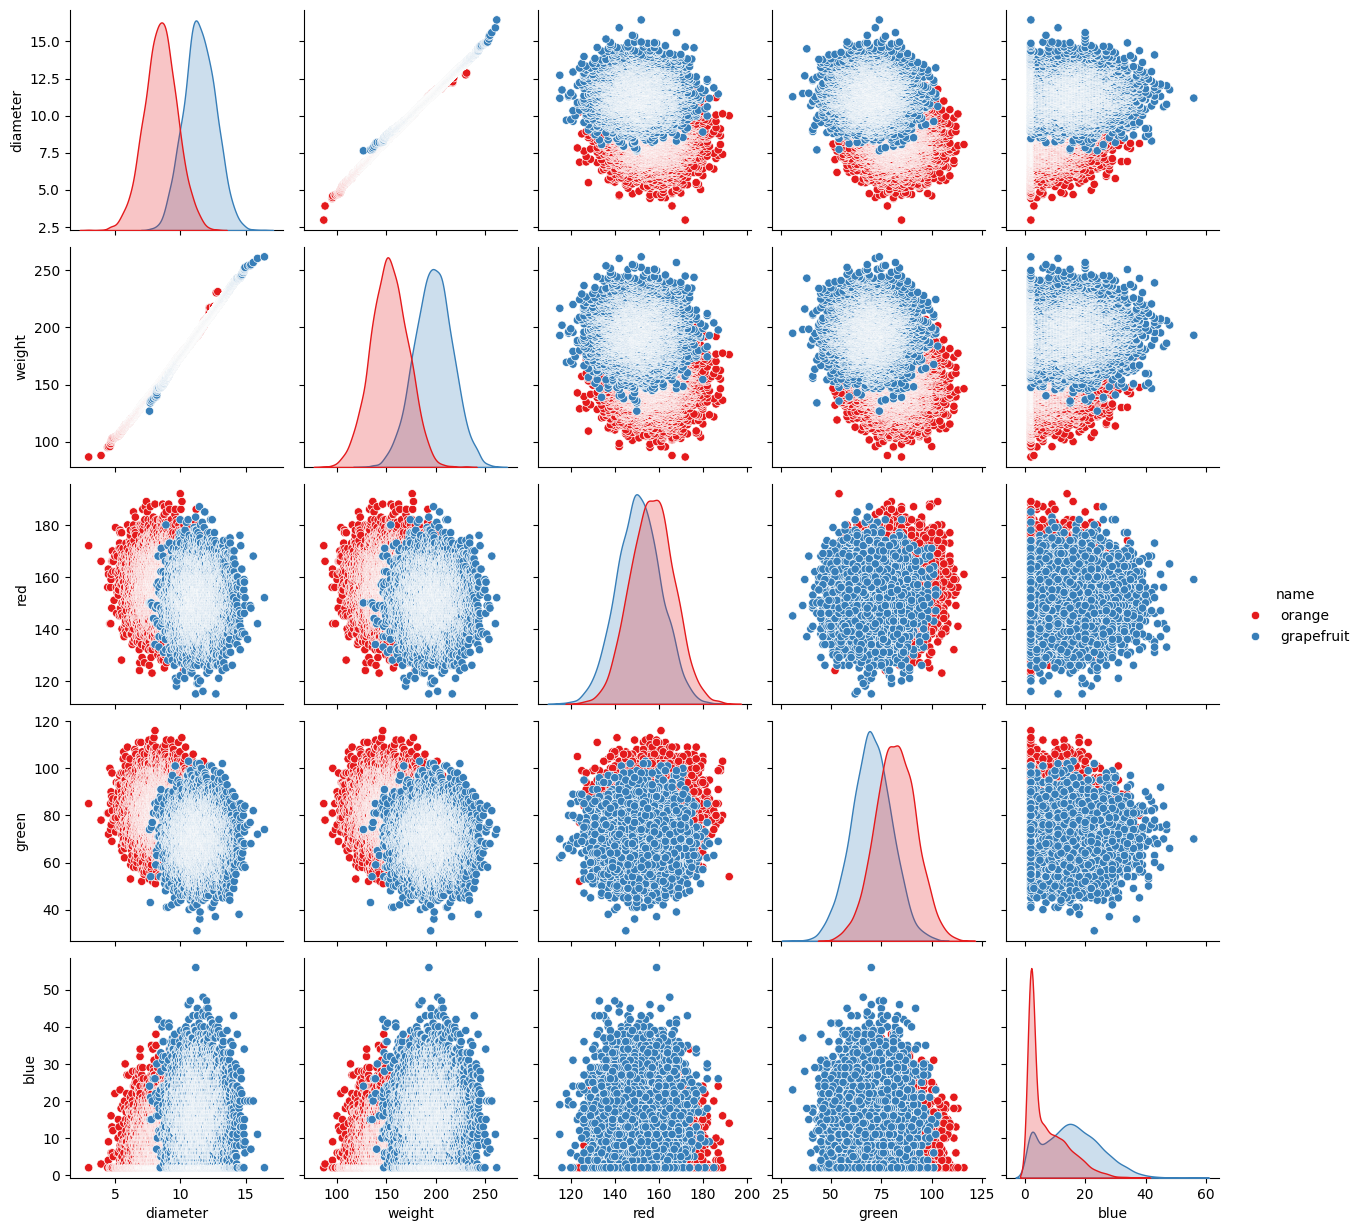

In [31]:
sns.pairplot(df, hue='name', palette='Set1')
plt.show()


 3. Pembagian Data (Training dan Testing)
Pisahkan fitur dan label:

In [32]:
X = df.drop('name', axis=1)
y = df['name']


Bagi menjadi data latih dan data uji (70:30):

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train))  # Jumlah data latih


7000


 4. Membangun Model Decision Tree
Gunakan metode DecisionTreeClassifier:

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report  # Import classification_report here

model = DecisionTreeClassifier(
    criterion='entropy',            
    random_state=42             
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  grapefruit       0.94      0.96      0.95      1463
      orange       0.96      0.94      0.95      1537

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



 5. Evaluasi Model
 Classification Report:

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  grapefruit       0.94      0.96      0.95      1463
      orange       0.96      0.94      0.95      1537

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



 Confusion Matrix (Visualisasi):

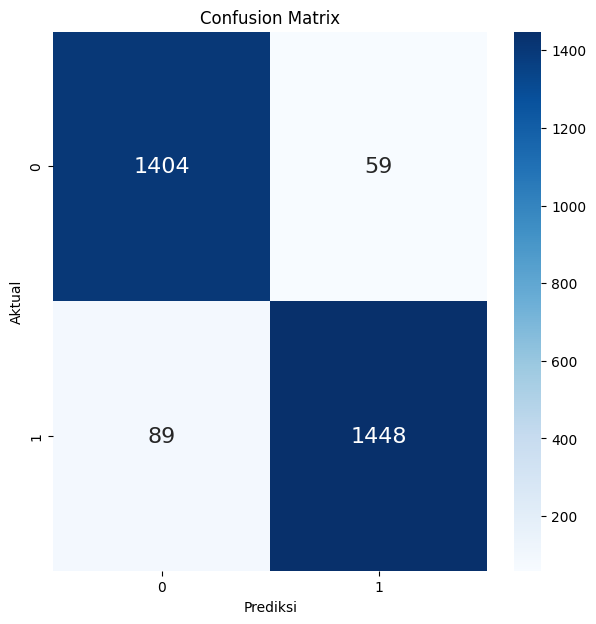

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


 6. Visualisasi Decision Tree
Visualisasi struktur pohon:

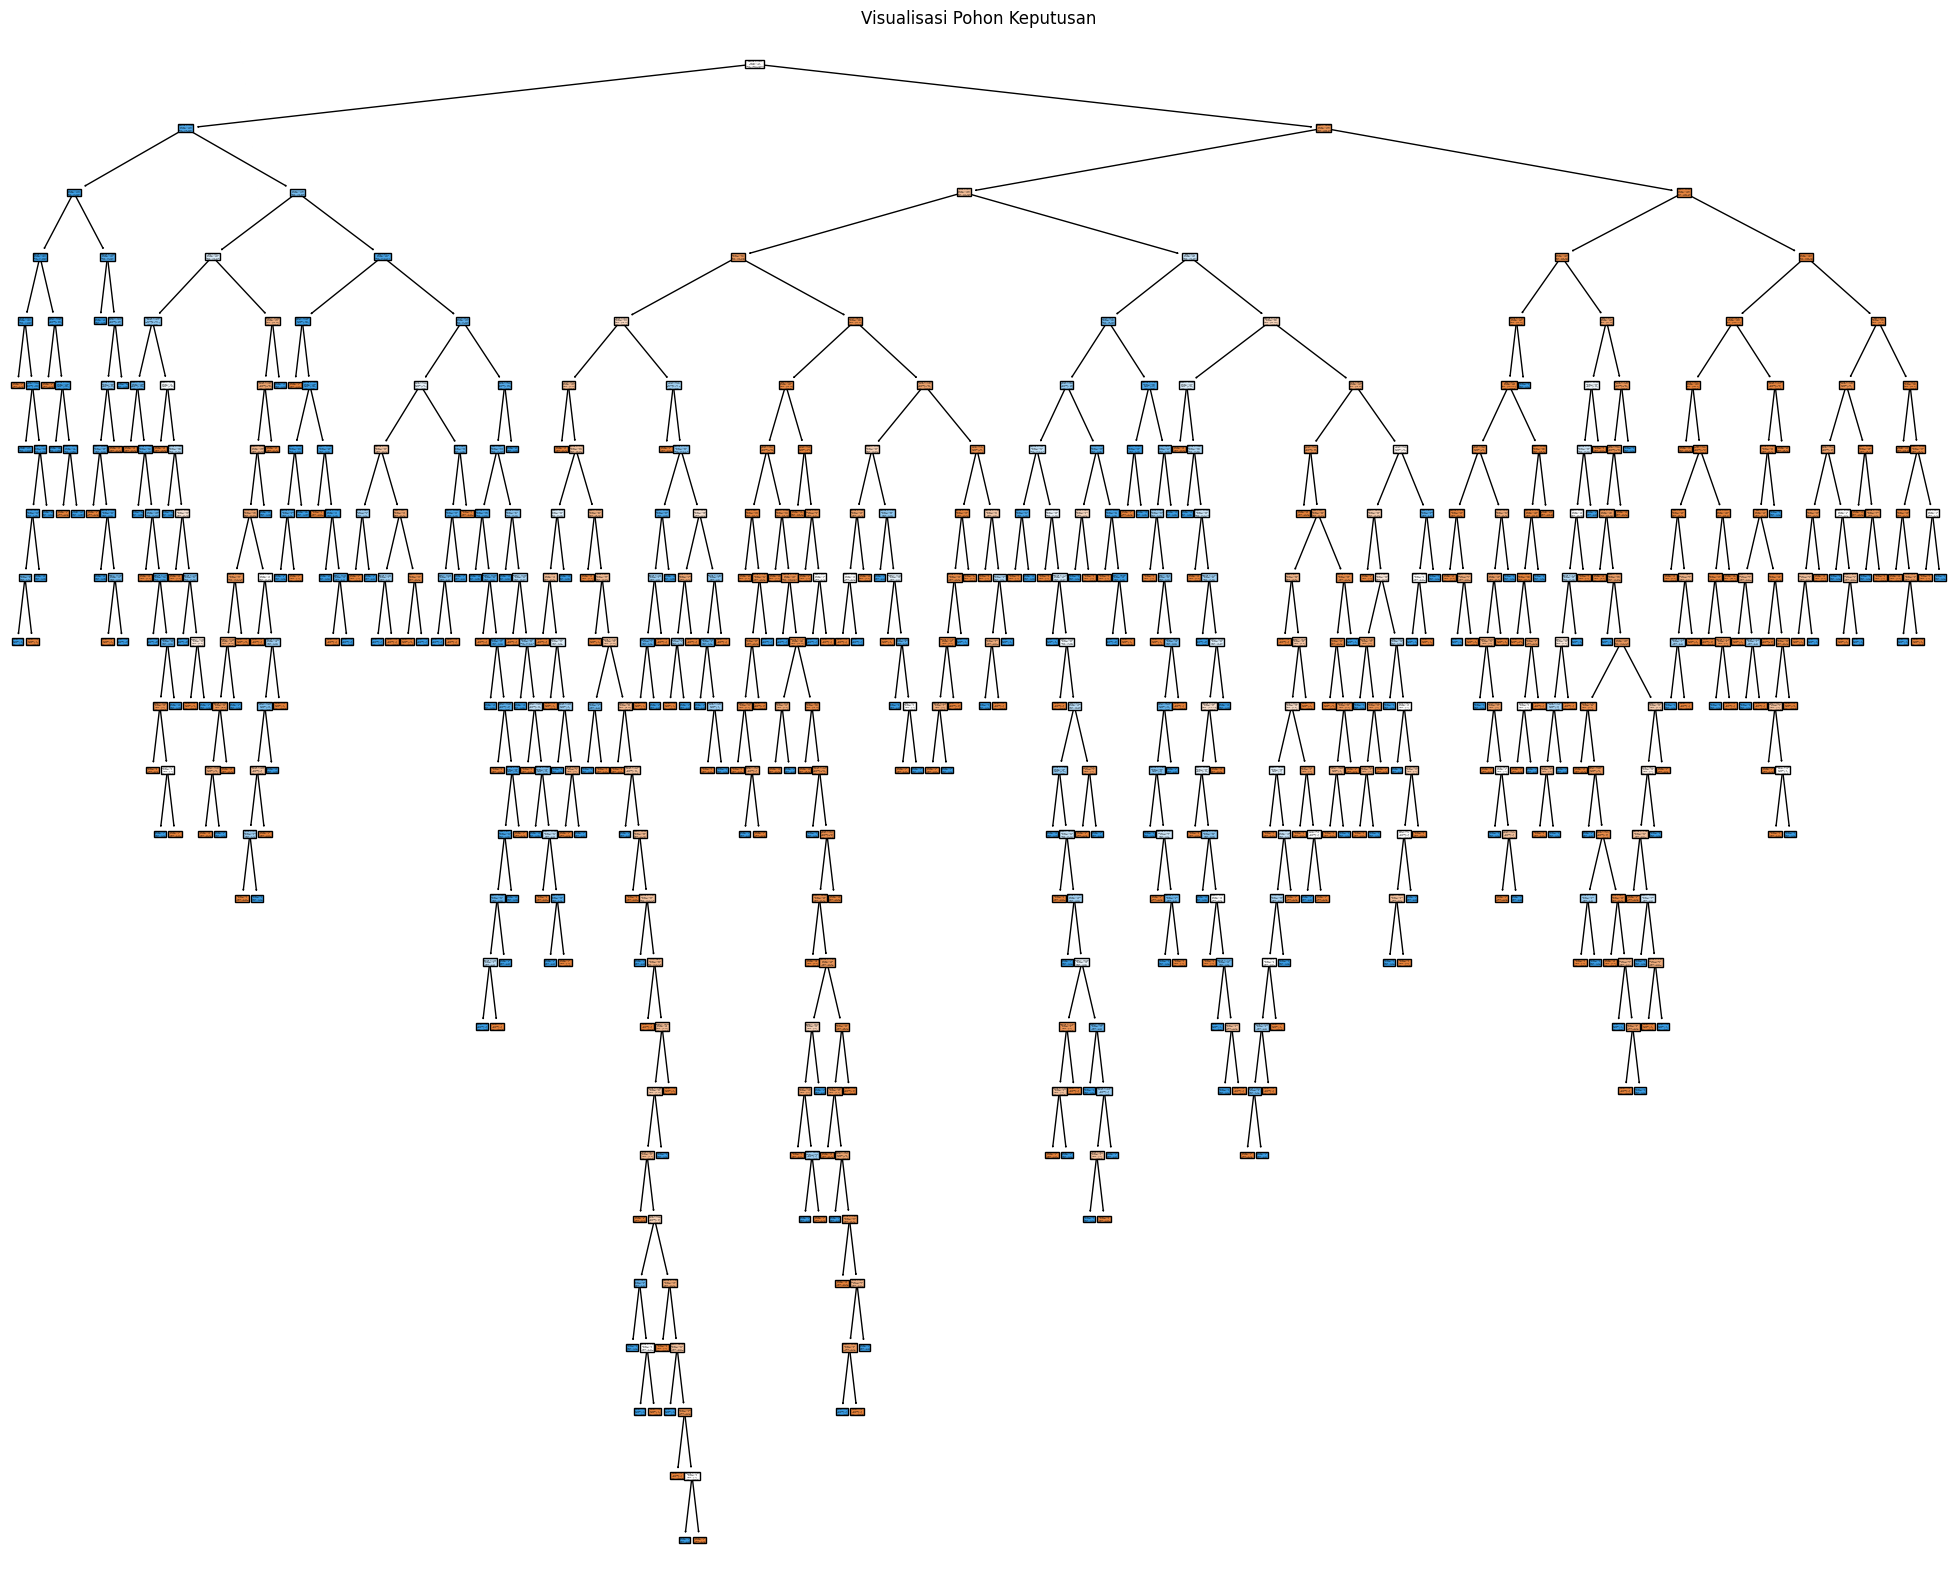

In [37]:
from sklearn import tree

plt.figure(figsize=(25, 20))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()


 7. Uji Coba Data Baru
Uji model dengan data uji manual:

In [ ]:
sample = pd.DataFrame([{
    'diameter': 4.7,
    'weight': 180,
    'red': 145,
    'green': 68,
    'blue': 22
}])

sample = sample[X.columns]
prediction = model.predict(sample)
print("Prediksi buah:", prediction[0])


Prediksi buah: orange
